In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Globals

In [ ]:
# width from which you want to resize with ratio and then crop
MAX_SIZE = (1000, 1000)

FIN_WIDTH = 500
FIN_HEIGHT = 400

# Imports

In [ ]:
import PIL
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import os, sys

In [ ]:
PIL.__version__

# Helper functions

In [ ]:
BASE_DIR = "/content/drive/My Drive/"

os.chdir(BASE_DIR)
!ls

'Colab Notebooks'			 'IDC SylphideDB.gdoc'
 compostNet_inceptV4_ckpt		  image_compostNet
 CompostNet_inceptV4_model.h5		 'laurea ary (originale).mp4'
 CompostNet_inceptV4_model_revisione.h5   logs
 compost_p.jpg				  my_test_vecchio
'dndosolostoria (1).gdoc'		  predictions
'dndosolostoria (2).gdoc'		 'predictions (1)'
 dndosolostoria.gdoc			 'robe intrigila'
 ds_mytest				  split_compostNet
 ds_trashnet_resized			  TrashNet_AlexNet_model.h5
 ds_trashnet_split			  TrashNet_AlexNet_revisione_model.h5


In [ ]:
# by: Arianna Patrizi

# function that takes final dimensions of the image you want to crop from center

def crop_from_center(final_width, final_height, img):
  width, height = img.size
  reduce_oriz = width - final_width
  reduce_vert = height - final_height
  left = reduce_oriz/2
  upper = reduce_vert/2
  right = left + final_width
  bottom = upper + final_height
  
  return img.crop((left, upper, right, bottom))

# function that first resizes all images in directory mantaining the ratio
# then crops from center to obtain the wanted dimensions

def resize_directory(path, name):
  dirs = os.listdir(path)
  i = 0
  os.chdir(path)
  for item in dirs:
    if os.path.isfile(path+item):
      img = Image.open(path+item)
      f, e = os.path.splitext(path+item)
      img.thumbnail(MAX_SIZE, Image.ANTIALIAS)
      img = crop_from_center(FIN_WIDTH, FIN_HEIGHT, img)
      img.save(f + e, 'JPEG', quality=90)
      filename = path + name + '_' + str(i) + '.jpeg'
      print(filename)
      # print(f)
      os.rename(f + e, filename)
      i += 1
  os.chdir(BASE_DIR)



# Tests



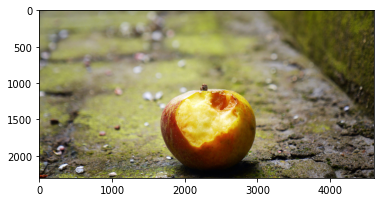

In [ ]:
img = Image.open('compost_p.jpg')
imshow(np.asarray(img))


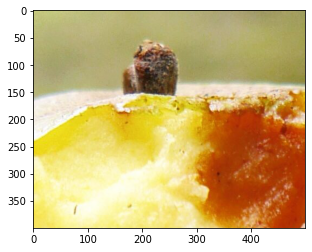

In [ ]:
img = crop_from_center(FIN_WIDTH, FIN_HEIGHT, img)
imshow(np.asarray(img))

/content/drive/My Drive/predictions (1)/prediction_0.jpeg
/content/drive/My Drive/predictions (1)/prediction_1.jpeg
/content/drive/My Drive/predictions (1)/prediction_2.jpeg
/content/drive/My Drive/predictions (1)/prediction_3.jpeg
/content/drive/My Drive/predictions (1)/prediction_4.jpeg
/content/drive/My Drive/predictions (1)/prediction_5.jpeg
/content/drive/My Drive/predictions (1)/prediction_6.jpeg


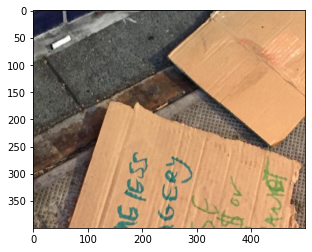

In [ ]:
OBJ_DIR = BASE_DIR + 'predictions (1)/'

resize_directory(OBJ_DIR, 'prediction')
dirs = os.listdir(OBJ_DIR)

# show first image resized
img = Image.open(OBJ_DIR + '/' + dirs[0])
imshow(img)

# show all dir
# for filename in dirs:
  # img = Image.open(OBJ_DIR + '/' + filename)
  # imshow(img)

# Preparazione del dataset

In [ ]:
DATA_DIR = BASE_DIR + 'ds_mytest/'

data_dir = os.listdir(DATA_DIR)

print(data_dir)

for dir in data_dir:
  resize_directory(DATA_DIR + dir + '/', dir)


['trash', 'metal', 'cardboard', 'compost', 'glass', 'plastic', 'paper']
/content/drive/My Drive/ds_mytest/trash/trash_0.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_1.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_2.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_3.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_4.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_5.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_6.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_7.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_8.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_9.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_10.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_11.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_12.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_13.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_14.jpeg
/content/drive/My Drive/ds_mytest/trash/trash_15.jpeg
/content/drive/My Drive/ds_mytest/metal/metal_0.jpeg
/content/drive/My Dri